In [1]:
!pip install pmdarima

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# components of TS
from statsmodels.tsa.seasonal import seasonal_decompose

# DF test|
from statsmodels.tsa.stattools import adfuller,acf,pacf

# difference data (another method)
from statsmodels.tsa.statespace.tools import diff

# ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm # LJung-box

import warnings
warnings.filterwarnings("ignore")

## *`Reading Dataset`*

In [10]:
so_df=pd.read_csv("Final_SportsOutdoors.csv")

In [11]:
so_df

,reviewerID,productID,reviewerName,helpful,reviewText,ratings,summary,Date,clean,sentiment,sentimentScore
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5,Woks very good,2014-01-26,come time veru happy have use already make tak...,Excellent,5
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5,Works as well as the factory tool,2012-02-02,factory glock tool use glock ive since lose ne...,Excellent,5
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4,"It's a punch, that's all.",2012-02-28,dont punch would like one glock bag okay butt ...,Good,4
3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]",This works no better than any 3/32 punch you w...,4,It's a punch with a Glock logo.,2012-02-05,work better punch would find hardware store ac...,Good,4
4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]",I purchased this thinking maybe I need a speci...,4,"Ok,tool does what a regular punch does.",2013-04-23,purchase think maybe need special tool easily ...,Good,4
...,...,...,...,...,...,...,...,...,...,...,...
296180,A2XX2A4OJCDNLZ,B00LFPS0CY,RatherLiveInKeyWest,"[2, 3]",This is a water bottle done right. It is a ver...,5,Hydracentials Sporty 25 Oz Stainless Steel Wat...,2014-07-11,water bottle do right nice look double wall st...,Excellent,5
296181,A3LGT6UZL99IW1,B00LFPS0CY,"Richard C. Drew ""Anaal Nathra/Uthe vas Bethod...","[0, 0]",If you're looking for an insulated water bottl...,5,"Large, incredibly well made water bottle!",2014-07-18,youre look insulate water bottle hold lot liqu...,Excellent,5
296182,ASKZO80Z1RKTR,B00LFPS0CY,Robin Lee,"[0, 0]","This Hydracentials Sporty 25 OZ, double insula...",5,"""Great Water Bottle For Hot Day""......",2014-07-21,hydracentials sporty oz double insulate water ...,Excellent,5
296183,APRNS6DB68LLV,B00LFPS0CY,"Rob Slaven ""slavenrm@gmail. com""","[1, 1]",As usual I received this item free in exchange...,5,A pretty impressive water bottle. Best I've s...,2014-07-21,usual receive item free exchange review also u...,Excellent,5


In [12]:
so_df.describe()

,ratings,sentimentScore
count,296185.000000,296185.000000
mean,4.393538,4.393538
std,0.986778,0.986778
min,1.000000,1.000000
25%,4.000000,4.000000
50%,5.000000,5.000000
75%,5.000000,5.000000
max,5.000000,5.000000


In [13]:
so_df['Date'] = pd.to_datetime(so_df['Date'])

In [14]:
so_df1 = so_df.sort_values(['Date'])

In [15]:
so_df1.head(3)

,reviewerID,productID,reviewerName,helpful,reviewText,ratings,summary,Date,clean,sentiment,sentimentScore
229,A1M2T0J45TTE64,B00004S9I0,G. Powell,"[118, 122]",I have a cheap gas stove and I always wanted o...,5,Great stove top giddle/Or use for broiling!,2002-03-07,cheap gas stave always want one expensive vers...,Excellent,5
5814,A11I1I9QLMAM1A,B0000D80FM,S. Power,"[0, 0]",The manufacturer says to use their ink in thei...,4,Quality and reliability of the real thing at a...,2002-09-03,manufacturer say use ink printer course go say...,Good,4
158,AGFW667QNHDOY,B00000IURU,S. Lipson,"[11, 13]",I bought this toy for my almost 2 and 3 year o...,5,great fun!,2002-09-20,buy toy almost year old boys well gift girls r...,Excellent,5


In [16]:
# set time data as an index
so_df1 = so_df1.set_index('Date')
print(so_df1.head())

                reviewerID   productID  \
Date                                     
2002-03-07  A1M2T0J45TTE64  B00004S9I0   
2002-09-03  A11I1I9QLMAM1A  B0000D80FM   
2002-09-20   AGFW667QNHDOY  B00000IURU   
2002-11-28  A1MR1VMK999I6O  B00004S9I0   
2003-01-12   A96JD9312DHWC  B00005JD40   

                                                reviewerName     helpful  \
Date                                                                       
2002-03-07                                         G. Powell  [118, 122]   
2002-09-03                                          S. Power      [0, 0]   
2002-09-20                                         S. Lipson    [11, 13]   
2002-11-28  Beth DeRoos "Beth DeRoos from the California ...    [21, 25]   
2003-01-12        TorridlyBoredShopper "T(to the)B(to the)S"    [84, 95]   

                                                   reviewText  ratings  \
Date                                                                     
2002-03-07  I have a che

In [17]:
so_df1.head()

,reviewerID,productID,reviewerName,helpful,reviewText,ratings,summary,clean,sentiment,sentimentScore
Date,,,,,,,,,,
2002-03-07,A1M2T0J45TTE64,B00004S9I0,G. Powell,"[118, 122]",I have a cheap gas stove and I always wanted o...,5,Great stove top giddle/Or use for broiling!,cheap gas stave always want one expensive vers...,Excellent,5
2002-09-03,A11I1I9QLMAM1A,B0000D80FM,S. Power,"[0, 0]",The manufacturer says to use their ink in thei...,4,Quality and reliability of the real thing at a...,manufacturer say use ink printer course go say...,Good,4
2002-09-20,AGFW667QNHDOY,B00000IURU,S. Lipson,"[11, 13]",I bought this toy for my almost 2 and 3 year o...,5,great fun!,buy toy almost year old boys well gift girls r...,Excellent,5
2002-11-28,A1MR1VMK999I6O,B00004S9I0,"Beth DeRoos ""Beth DeRoos from the California ...","[21, 25]","I cannot recommend this grill/griddle enough, ...",5,A classic gem ~ must own,cannot recommend grillgriddle enough since ver...,Excellent,5
2003-01-12,A96JD9312DHWC,B00005JD40,"TorridlyBoredShopper ""T(to the)B(to the)S""","[84, 95]",When I purchased my Coleman Comfort Control Qu...,5,Decisions and the Sometimes Proud Outcomes,purchase coleman comfort control quickbed deci...,Excellent,5


## *`Getting the required columns`*

In [18]:
# retrieve only sentimentScore value from dataframe
#0-negative,1-neutral,2-positive
x = so_df1['sentimentScore']
x.head()

Date
2002-03-07    5
2002-09-03    4
2002-09-20    5
2002-11-28    5
2003-01-12    5
Name: sentimentScore, dtype: int64

In [19]:
#Resampled the dates in monthwise
y = x.resample('MS').mean()
y.head()

Date
2002-03-01    5.0
2002-04-01    NaN
2002-05-01    NaN
2002-06-01    NaN
2002-07-01    NaN
Freq: MS, Name: sentimentScore, dtype: float64

In [20]:
y.dropna(inplace=True)

In [21]:
y.head()

Date
2002-03-01    5.00
2002-09-01    4.50
2002-11-01    5.00
2003-01-01    3.75
2003-02-01    4.00
Name: sentimentScore, dtype: float64

In [22]:
type(y)

pandas.core.series.Series

<AxesSubplot:xlabel='Date'>

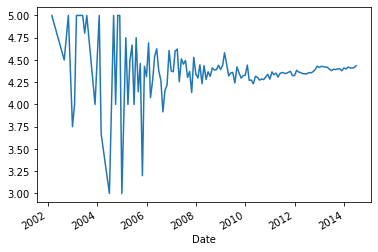

In [23]:
y.plot()

# Perform some visual inspections about the data.

In [24]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

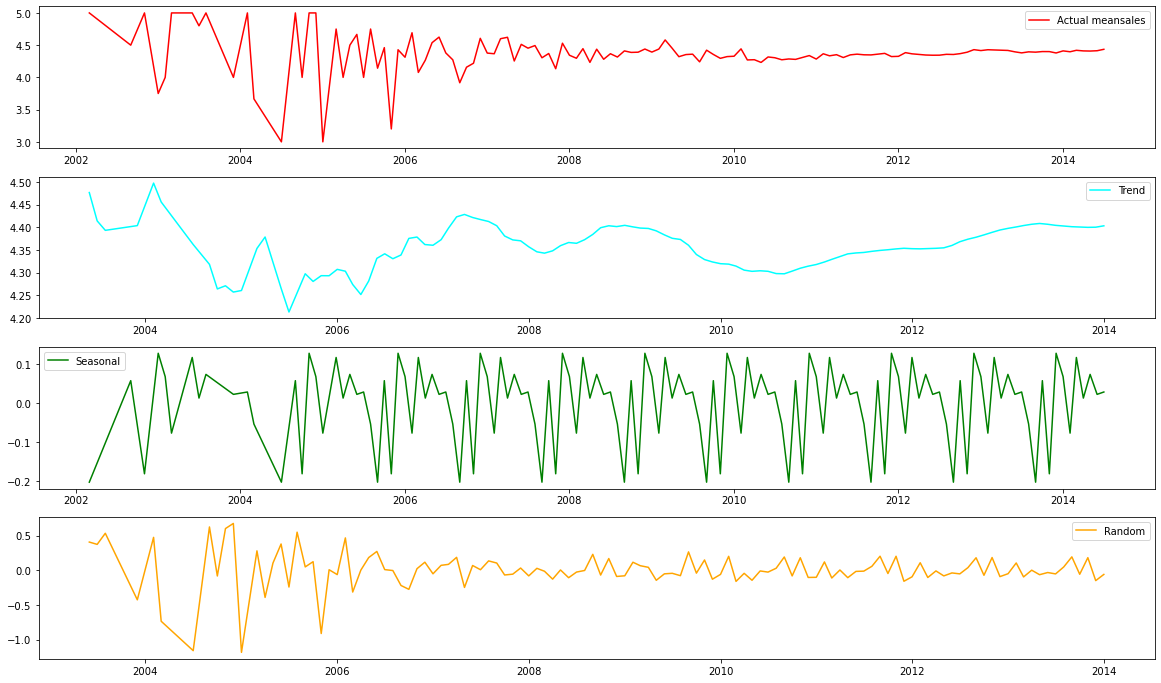

In [25]:
decomposition = seasonal_decompose(y, freq=12)

d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residuals = decomposition.resid


# plotting all the 4 graphs
_,ax = plt.subplots(4,1,figsize=(20,12))

# Original data
plt.subplot(411)
plt.plot(y,label = "Actual meansales",color = "red")
plt.legend()

# Trend
plt.subplot(412)
plt.plot(d_trend,label = "Trend",color = "cyan")
plt.legend()

# Seasonality
plt.subplot(413)
plt.plot(d_seasonal, label = "Seasonal",color = "green")
plt.legend()

# Residual (random)
plt.subplot(414)
plt.plot(d_residuals, label = "Random",color = "orange")
plt.legend()

In [26]:
d_seasonal

Date
2002-03-01   -0.202332
2002-09-01    0.058174
2002-11-01   -0.180788
2003-01-01    0.128492
2003-02-01    0.068555
                ...   
2014-03-01    0.117672
2014-04-01    0.013520
2014-05-01    0.074254
2014-06-01    0.023033
2014-07-01    0.029096
Name: seasonal, Length: 131, dtype: float64

In [27]:
lags=20
moving_avg = y.rolling(window=lags).mean()
moving_avg

Date
2002-03-01         NaN
2002-09-01         NaN
2002-11-01         NaN
2003-01-01         NaN
2003-02-01         NaN
                ...   
2014-03-01    4.399143
2014-04-01    4.401790
2014-05-01    4.404451
2014-06-01    4.406707
2014-07-01    4.408954
Name: sentimentScore, Length: 131, dtype: float64

In [28]:
df_ma=pd.DataFrame({'actual':y,'ma_Sentiments':moving_avg})
df_ma

,actual,ma_Sentiments
Date,,
2002-03-01,5.000000,NaN
2002-09-01,4.500000,NaN
2002-11-01,5.000000,NaN
2003-01-01,3.750000,NaN
2003-02-01,4.000000,NaN
...,...,...
2014-03-01,4.420227,4.399143
2014-04-01,4.410777,4.401790
2014-05-01,4.408528,4.404451


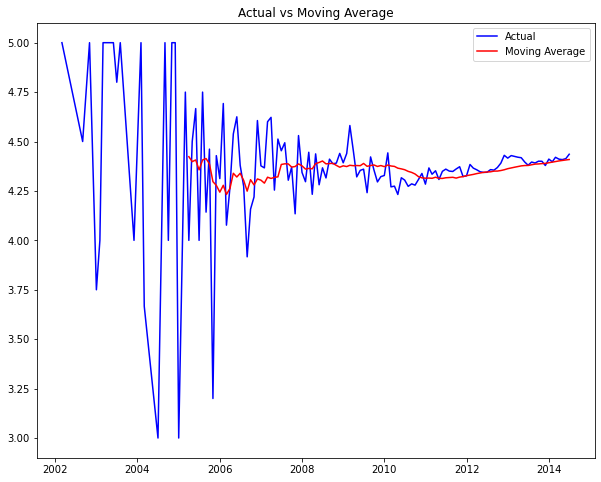

In [29]:
_,ax = plt.subplots(figsize=(10,8))
plt.plot(df_ma.actual,color="blue",label = "Actual")
plt.plot(df_ma.ma_Sentiments, color="red" ,label = "Moving Average")
plt.title("Actual vs Moving Average")
plt.legend()

# Triple Exponent Smoothing

When graph has both trend and seasonality we have to perform triple exponent smoothing

In [30]:
# Exponential Smoothing
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

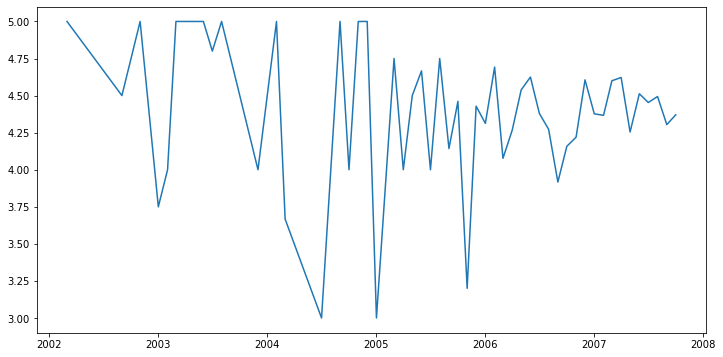

In [31]:
# plot the data
_,ax = plt.subplots(1,1,figsize=(12,6))
plt.plot(y[0:50])

In [32]:
y.head(3)

Date
2002-03-01    5.0
2002-09-01    4.5
2002-11-01    5.0
Name: sentimentScore, dtype: float64

In [33]:
# build model
model_tplexp = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=12).fit()

In [34]:
# forecast
f_tplexp = model_tplexp.fittedvalues

Text(0.5, 1.0, 'Triple Exponent Smoothing')

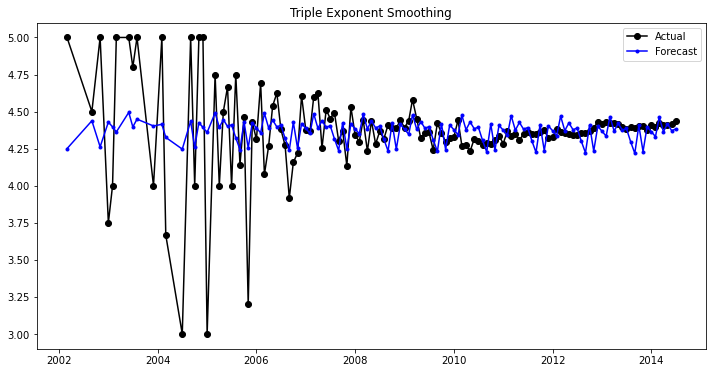

In [35]:
# plot the actual and triple smoothing values
_,ax = plt.subplots(1,1,figsize=(12,6))
plt.plot(y,marker='o',color='black',label='Actual')
plt.plot(f_tplexp,marker='.',color='blue',label='Forecast')
plt.legend()
plt.title("Triple Exponent Smoothing")

# Check data for stationarity.

In [36]:
# dickey-fuller test for stationarity
'''
output of adfuller: 
i) test statistic
ii) pvalue
iii) lags
iv) total number of records
''' 

def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        msg = "pvalue={}. Data is stationary, proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not stationary. Make the data Stationary before model building".format(pvalue)
    
    return(msg)
    

In [37]:
# function call (to determine the stationarity)
checkStationarity(y)

'pvalue=0.2337045501251851. Data is not stationary. Make the data Stationary before model building'

# If Data is not Stationary use Differentiation

In [38]:
diff_y = y - y.shift()

In [39]:
# remove the Nulls from the differenced data
print("Before removing Nulls, total records = {}".format(len(diff_y)))
diff_y.dropna(inplace=True)
print("After removing Nulls, total records = {}".format(len(diff_y)))

Before removing Nulls, total records = 131
After removing Nulls, total records = 130


In [40]:
diff_y

Date
2002-09-01   -0.500000
2002-11-01    0.500000
2003-01-01   -1.250000
2003-02-01    0.250000
2003-03-01    1.000000
                ...   
2014-03-01    0.022640
2014-04-01   -0.009451
2014-05-01   -0.002249
2014-06-01    0.004935
2014-07-01    0.022190
Name: sentimentScore, Length: 130, dtype: float64

In [41]:
checkStationarity(diff_y)

'pvalue=1.7433544146947369e-10. Data is stationary, proceed to model building'

## *`Visually checking the dataset`*

## *`Decomposing the data`*

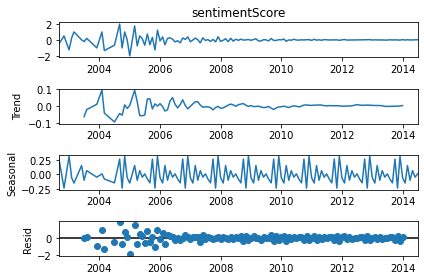

In [42]:
decomposition = sm.tsa.seasonal_decompose(diff_y,freq=12)
fig = decomposition.plot()
plt.show()

# Plot ACF and PACF.

Text(0.5, 1.0, 'Partial Auto Correlation (p)')

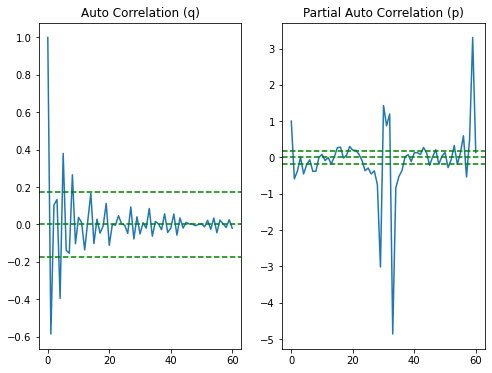

In [43]:
# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# since, lags cannot be determined at the beginning, set a random number initially
fb_acf = acf(diff_y, nlags=60)
fb_pacf = pacf(diff_y, nlags=60)

_,ax = plt.subplots(1,1,figsize=(8,6))
# plot ACF
plt.subplot(121)
plt.plot(fb_acf)
plt.axhline(y=0, linestyle="--", color="green")
plt.axhline(y=-1.96/np.sqrt(len(diff_y)), linestyle="--", color="green")
plt.axhline(y=1.96/np.sqrt(len(diff_y)), linestyle="--", color="green")
plt.title("Auto Correlation (q)")

# plot PACF
plt.subplot(122)
plt.plot(fb_pacf)
plt.axhline(y=0, linestyle="--", color="green")
plt.axhline(y=-1.96/np.sqrt(len(diff_y)), linestyle="--", color="green")
plt.axhline(y=1.96/np.sqrt(len(diff_y)), linestyle="--", color="green")
plt.title("Partial Auto Correlation (p)")

# Split data into training and test parts

In [44]:
# split the data into train and test
ss = int(0.7 * len(diff_y))

train = pd.DataFrame(diff_y.iloc[:ss])
test = pd.DataFrame(diff_y.iloc[ss:])
print("train = {}, test = {}".format(len(train), len(test)))

train = 91, test = 39


In [45]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm # LJung-box

# ARMA MODEL

In [46]:
p=2; q=1
m1 = ARMA(diff_y,order=(p,0,q)).fit()

In [47]:
print(m1.summary())

                              ARMA Model Results                              
Dep. Variable:         sentimentScore   No. Observations:                  130
Model:                     ARMA(2, 0)   Log Likelihood                 -48.073
Method:                       css-mle   S.D. of innovations              0.349
Date:                Mon, 21 Feb 2022   AIC                            104.146
Time:                        06:33:56   BIC                            115.617
Sample:                             0   HQIC                           108.807
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0031      0.014     -0.214      0.831      -0.031       0.025
ar.L1.sentimentScore    -0.7970      0.081     -9.786      0.000      -0.957      -0.637
ar.L2.sentim

In [48]:
m1.aic,m1.bic

(104.14646811342504, 115.61660591524738)

In [49]:
predictions = m1.predict(0,len(test)-1)
print(predictions)

Date
2002-09-01   -0.003051
2002-11-01    0.288218
2003-01-01   -0.225184
2003-02-01    0.809760
2003-03-01    0.243890
2003-06-01   -0.893503
2003-07-01   -0.366351
2003-08-01    0.152816
2003-12-01   -0.094022
2004-02-01    0.718446
2004-03-01   -0.443789
2004-07-01    0.696289
2004-09-01    1.004436
2004-10-01   -1.360693
2004-11-01    0.070858
2004-12-01   -0.443789
2005-01-01   -0.366351
2005-03-01    1.587381
2005-04-01   -0.681752
2005-05-01   -0.038445
2005-06-01   -0.135241
2005-07-01   -0.319296
2005-08-01    0.464779
2005-09-01   -0.364467
2005-10-01    0.207473
2005-11-01   -0.042130
2005-12-01    0.884189
2006-01-01   -0.531861
2006-02-01   -0.356078
2006-03-01   -0.267520
2006-04-01    0.347226
2006-05-01    0.063596
2006-06-01   -0.291459
2006-07-01   -0.173333
2006-08-01    0.158096
2006-09-01    0.166757
2006-10-01    0.315539
2006-11-01   -0.070733
2006-12-01   -0.142475
dtype: float64


In [50]:
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(diff_y[i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

      actual  predicted       err
0  -0.500000  -0.003051 -0.496949
1   0.500000   0.288218  0.211782
2  -1.250000  -0.225184 -1.024816
3   0.250000   0.809760 -0.559760
4   1.000000   0.243890  0.756110
5   0.000000  -0.893503  0.893503
6  -0.200000  -0.366351  0.166351
7   0.200000   0.152816  0.047184
8  -1.000000  -0.094022 -0.905978
9   1.000000   0.718446  0.281554
10 -1.333333  -0.443789 -0.889545
11 -0.666667   0.696289 -1.362956
12  2.000000   1.004436  0.995564
13 -1.000000  -1.360693  0.360693
14  1.000000   0.070858  0.929142
15  0.000000  -0.443789  0.443789
16 -2.000000  -0.366351 -1.633649
17  1.750000   1.587381  0.162619
18 -0.750000  -0.681752 -0.068248
19  0.500000  -0.038445  0.538445
20  0.166667  -0.135241  0.301908
21 -0.666667  -0.319296 -0.347371
22  0.750000   0.464779  0.285221
23 -0.607143  -0.364467 -0.242676
24  0.318681   0.207473  0.111209
25 -1.261538  -0.042130 -1.219409
26  1.228571   0.884189  0.344382
27 -0.116071  -0.531861  0.415790
28  0.379808  

<AxesSubplot:>

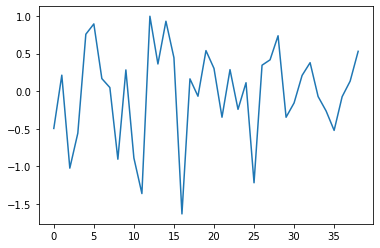

In [51]:
df_res.err.plot()

In [52]:
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model",pvalue)
else:
    print("Fail-to-Reject H0. Good model",pvalue)

Fail-to-Reject H0. Good model [0.92406226]


In [53]:
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(2,1)
	MSE = 0.3959908937267698
	RMSE = 0.629278073451451


Text(0.5, 1.0, 'ARMA Model. Order=(2,1)')

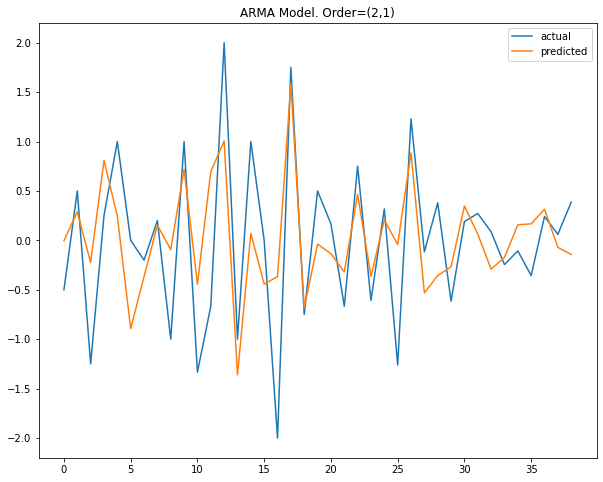

In [54]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

## ARIMA

In [55]:
# ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [56]:
# initial values for p,d,q
p=2; d=1; q=1

m1 = ARIMA(diff_y, order=(p,d,q)).fit()

In [57]:
# summarise the model
print(m1.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.sentimentScore   No. Observations:                  129
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -51.286
Method:                       css-mle   S.D. of innovations              0.350
Date:                Mon, 21 Feb 2022   AIC                            112.571
Time:                        06:34:49   BIC                            126.870
Sample:                             1   HQIC                           118.381
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0002      0.000      0.476      0.634      -0.001       0.001
ar.L1.D.sentimentScore    -0.7929      0.082     -9.686      0.000      -0.953      -0.632
ar.L

In [58]:
# forecast
start = len(train)
end = len(train)+len(test) - 1

# parameter ="levels" indicates that the predictions are in the original format of the data (ie non-differenced data)
predictions = m1.predict(start,end,typ="levels")
print(predictions[0:5])

Date
2011-05-01    0.004234
2011-06-01    0.035329
2011-07-01   -0.009977
2011-08-01   -0.015732
2011-09-01    0.012092
dtype: float64


In [59]:
# create a dataframe to store actual, predicted and error values
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(diff_y[i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual,'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted

In [60]:
print(df_res.head(10))

   actual  predicted       err
0   -0.50   0.004234 -0.504234
1    0.50   0.035329  0.464671
2   -1.25  -0.009977 -1.240023
3    0.25  -0.015732  0.265732
4    1.00   0.012092  0.987908
5    0.00   0.013430 -0.013430
6   -0.20  -0.000510 -0.199490
7    0.20  -0.004201  0.204201
8   -1.00   0.044450 -1.044450
9    1.00   0.024082  0.975918


<AxesSubplot:>

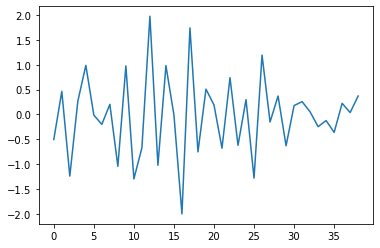

In [61]:
# plot the testing errors
df_res.err.plot()

In [62]:
# LJung-box test to determine model goodness
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values

if pvalue < 0.05:
    print("Bad Model")
else:
    print("Good Model")

Good Model


In [63]:
msg = "ARIMA model. Order(p,d,q) = " + str(p) + "," + str(d) + "," + str(q)
mse1 = mean_squared_error(df_res.actual,df_res.predicted)

print(msg + "\n\tMSE = {}\n\tRMSE = {}\n\tAIC = {}\n\tBIC = {}".format(mse1, np.sqrt(mse1),m1.aic,m1.bic))

ARIMA model. Order(p,d,q) = 2,1,1
	MSE = 0.6852555292391517
	RMSE = 0.8278016243274422
	AIC = 112.57113424953576
	BIC = 126.87019627134413


Text(0.5, 1.0, 'ARIMA model. Order(p,d,q) = 2,1,1')

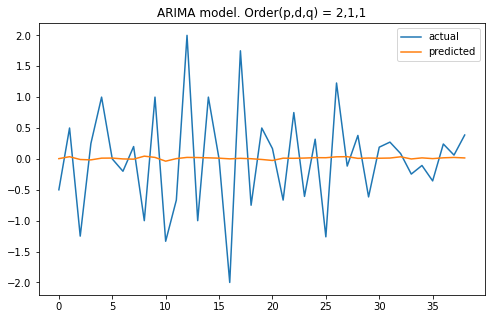

In [64]:
# plot the actual and predicted values
df_res.actual.plot(figsize=(8,5),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

In [65]:
# build and forecast for the next 'n' periods
m2 = ARIMA(diff_y,order=(p,d,q)).fit()

period = 5 # try forecast with other values
predictions_2 = m2.predict(len(diff_y), len(diff_y)+period, typ = 'levels').rename('predictions')

print(predictions_2)

129   -0.000268
130    0.011793
131    0.010621
132    0.007653
133    0.010820
134    0.009762
Name: predictions, dtype: float64


# SARIMAX

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [49]:
p=2; d=0; q=1

# seasonal order = (p,d,q,seasonal_frequency)
# check data/graph to identify the seasonal_frequency value

# seasonal frequency value
sfv = 30

m2 = SARIMAX(diff_y,order=(p,d,q), seasonal_order=(p,d,q,sfv)).fit()

In [50]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     sentimentScore   No. Observations:                  130
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 30)   Log Likelihood                  56.017
Date:                            Fri, 18 Feb 2022   AIC                            -98.035
Time:                                    00:56:20   BIC                            -77.962
Sample:                                         0   HQIC                           -89.879
                                            - 130                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0019      0.050     -0.037      0.971      -0.100       0.097
ar.L2         -0.0191      0.095     -0.200      0.841      -0.206       0.167
ma.L1         -0.9991      2.803     -0.356      0.722      -6.493       4.495
ar.S.L30       0.6334     22.301      0.028      0.977     -43.076      44.343
ar.S.L60       0.2748      7.269      0.038      0.970     -13.971      14.521
ma.S.L30      -0.9903     82.569     -0.012      0.990    -162.823     160.842
sigma2         0.0226      1.367      0.017      0.987      -2.656       2.702
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              1102.20
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -3.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
start = len(train)
end = len(train)+len(test) - 1

predictions = m2.predict(start,end)
print(predictions[0:5])

Date
2011-05-01   -0.003361
2011-06-01    0.022638
2011-07-01   -0.003046
2011-08-01   -0.023384
2011-09-01   -0.023550
Name: predicted_mean, dtype: float64


In [52]:
len(test), len(predictions)

(39, 39)

In [59]:
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(diff_y[i])
    pred.append(predictions[i])

df_res1 = pd.DataFrame({'actual':actual,'predicted':pred})
df_res1['err'] = df_res.actual - df_res.predicted

In [65]:
df_res1

,actual,predicted,err
0,0.000000,-0.003361,0.003361
1,0.000000,0.022638,-0.022638
2,-0.500000,-0.003046,-0.496954
3,0.500000,-0.023384,0.523384
4,0.000000,-0.023550,0.023550
5,0.000000,0.006116,-0.006116
6,0.000000,0.023423,-0.023423
7,0.000000,-0.005796,0.005796
8,0.000000,0.026414,-0.026414
9,0.000000,0.070492,-0.070492


In [72]:
msg1 = "SARIMAX model. Order(p,d,q) = " + str(p) + "," + str(d) + "," + str(q) + ": Seasonal value = " + str(sfv)
mse2 = mean_squared_error(df_res1.actual,df_res1.predicted)

print(msg + "\n\tMSE = {}\n\tRMSE = {}\n\tAIC = {}\n\tBIC = {}".format(mse2, np.sqrt(mse2),m2.aic,m2.bic))

SARIMAX model. Order(p,d,q) = 2,0,1: Seasonal value = 30
	MSE = 0.15137667235108848
	RMSE = 0.38907155171136387
	AIC = -98.03479668090776
	BIC = -77.96205552771869


In [73]:
aic1=m1.aic
bic1=m1.bic
aic2=m2.aic
bic2=m2.bic

Text(0.5, 1.0, 'SARIMAX model. Order(p,d,q) = 2,0,1: Seasonal value = 30')

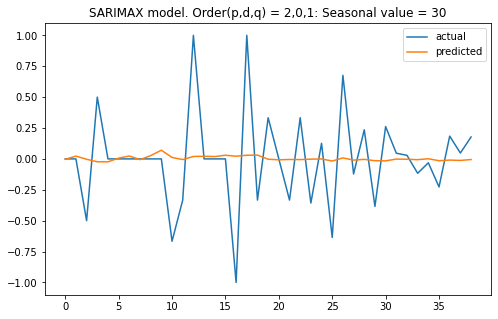

In [74]:
df_res1.actual.plot(figsize=(8,5),legend=True)
df_res1.predicted.plot(legend=True)
plt.title(msg1)

In [75]:
print("ARMA RMSE = {},ARMA AIC={},ARMA BIC={},\nSARIMAX RMSE = {},SARIMAX AIC={},SARIMAX BIC={}".format(np.sqrt(mse1),aic1,bic1,np.sqrt(mse2),aic2,bic2))

ARMA RMSE = 0.33573158683701954,ARMA AIC=-57.312496945138264,ARMA BIC=-45.84235914331593,
SARIMAX RMSE = 0.38907155171136387,SARIMAX AIC=-98.03479668090776,SARIMAX BIC=-77.96205552771869


# ARMA model has lowest RMSE , so it can be considered.